<h1> PREDICTING HEART DISEASE FROM THE GIVEN DATASET </H1>

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.metrics import confusion_matrix



In [207]:
data = pd.read_csv('../input/heart-disease-dataset/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [128]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]


In [129]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [130]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [131]:
data.age.value_counts()
pd.crosstab(data.target, data.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,7,0,4,4,8,3,4,11,...,15,11,22,6,3,11,0,0,0,3
1,4,6,8,6,8,10,3,29,22,15,...,12,14,9,6,6,3,11,3,3,0


In [132]:
pd.crosstab(x.sex,y)

target,0,1
sex,,
0,86,226
1,413,300


Text(0, 0.5, 'Amount')

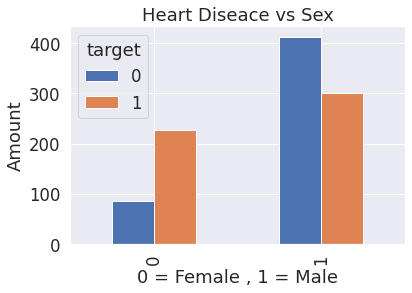

In [133]:
pd.crosstab(x.sex,y).plot.bar()
# plt.bar(x.sex,y) .... wrong method to plot for such a graph 
plt.title('Heart Diseace vs Sex')
plt.xlabel('0 = Female , 1 = Male')
plt.ylabel('Amount')

In [134]:
pd.crosstab(x.fbs,y)

target,0,1
fbs,,
0,417,455
1,82,71


<AxesSubplot:xlabel='fbs'>

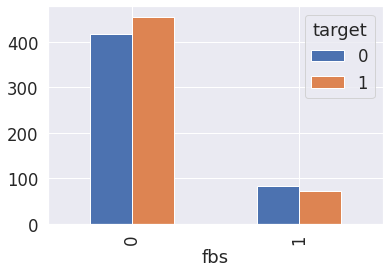

In [135]:
pd.crosstab(x.fbs,y).plot(kind='bar')

<AxesSubplot:xlabel='restecg'>

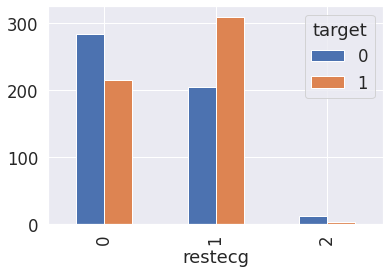

In [136]:
pd.crosstab(x.restecg,y).plot(kind='bar')

Comparing three diffrent variables including thhe target

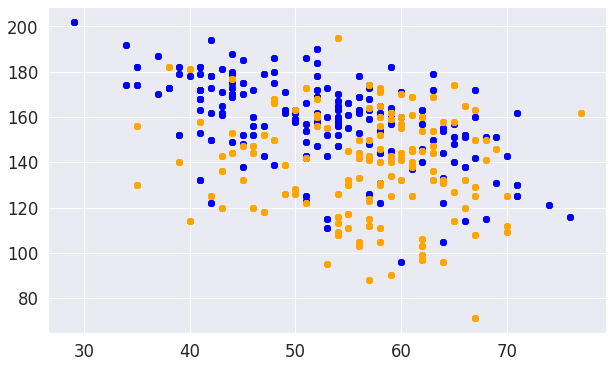

In [137]:
plt.figure(figsize=(10,6))
plt.scatter(x.age[y==1],
          x.thalach[y==1],c ='blue')
plt.scatter(x.age[y==0],
            x.thalach[y==0],c='orange')

Checking the distribution of age column

<AxesSubplot:ylabel='Frequency'>

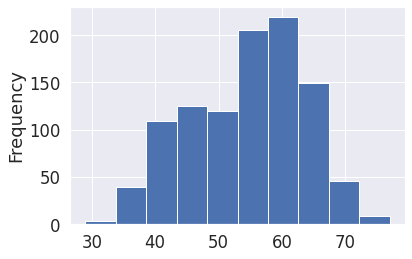

In [138]:
data.age.value_counts
# data.age.plot(kind='hist')
# or use 
data.age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

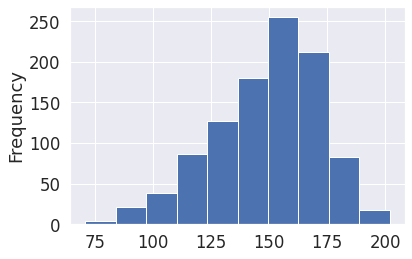

In [139]:
data.thalach.plot.hist()

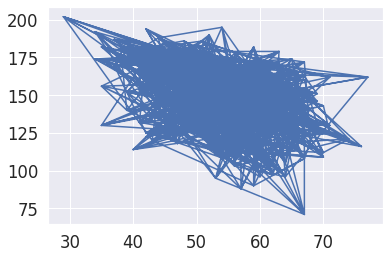

In [140]:
plt.plot(x.age,x.thalach)
plt.show()

In [141]:
data.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [142]:
pd.crosstab(x.cp,y)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


<AxesSubplot:xlabel='cp'>

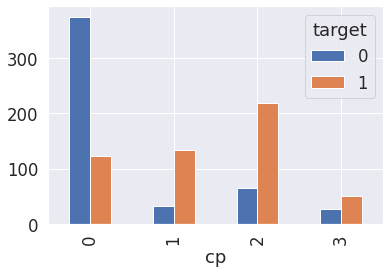

In [143]:
pd.crosstab(x.cp,y).plot(kind='bar')

Correlation matrix

In [144]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


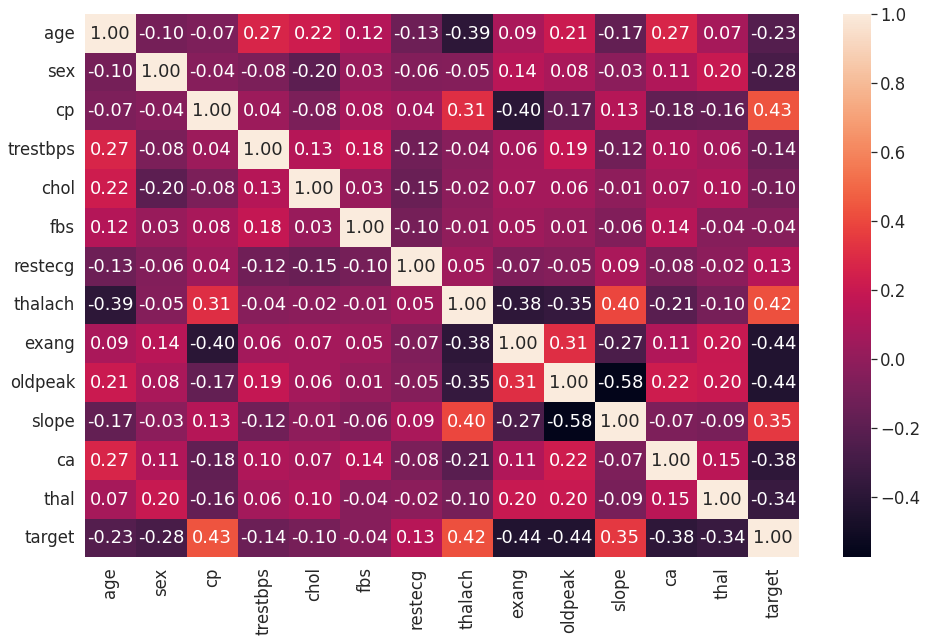

In [145]:
# corr_matrix = data.corr()
plt.figure(figsize=(16,10))
mefn=sns.heatmap(data.corr(),annot=True,fmt='.2f')


MACHINE LEARNING MODEL AND EVALUATION 

In [146]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y,train_size=0.8)

In [147]:
x_test,x_train,y_test,y_train

(      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 539    64    1   3       170   227    0        0      155      0      0.6   
 42     61    0   0       130   330    0        0      169      0      0.0   
 571    60    1   0       145   282    0        0      142      1      2.8   
 240    54    0   1       132   288    1        0      159      1      0.0   
 1013   58    1   0       114   318    0        2      140      0      4.4   
 ...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 60     29    1   1       130   204    0        0      202      0      0.0   
 285    71    0   2       110   265    1        0      130      0      0.0   
 547    67    0   0       106   223    0        1      142      0      0.3   
 186    40    1   0       110   167    0        0      114      1      2.0   
 996    56    0   0       134   409    0        0      150      1      1.9   
 
       slope  ca  thal  
 539       1   0     3  
 42        2

Now we will use Machine Learning model to train and test the data

Three models to try
1. Logistic regression
2. K-nearest neighbours classifier
3. Random Forest Classifiers

In [148]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [149]:
y_pred_lr = lr.predict(x_test)
y_pred_lr 

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,

In [150]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm1 = confusion_matrix(y_pred_lr,y_test)
cm1

array([[305,  32],
       [114, 369]])

In [151]:
lr_a_score = accuracy_score(y_pred_lr,y_test)
lr_a_score
# lr.score(x_test,y_test)

0.8219512195121951

In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [153]:
y_pred_knn = knn.predict(x_test)
y_pred_knn
# knn.score(x_test,y_test)

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [154]:
cm2 = confusion_matrix(y_pred_knn,y_test)
cm2

array([[246,  85],
       [173, 316]])

In [155]:
# knn_a_score = accuracy_score(y_pred_knn,y_test)
# knn_a_score
knn.score(x_test,y_test)

0.6853658536585366

In [156]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [157]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [158]:
cm3 = confusion_matrix(y_pred_rfc,y_test)
cm3

array([[345,  35],
       [ 74, 366]])

In [159]:
rfc_a_score = accuracy_score(y_pred_rfc,y_test)
rfc_a_score

0.8670731707317073

LIst of things that one must check for a certain model
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Croos - Validation
5. Precision
6. Recall
7. F1 Score
8. classification report
9. ROC curve
10. Area under the curve(AUC)

In [160]:
# Training KNN
test_scores = []
neighbors = range(1,21)
for i in neighbors:
  knn.set_params(n_neighbors = i)
  knn.fit(x_train,y_train)
  y_pred_knn = knn.predict(x_test)
  test_scores.append(accuracy_score(y_test,y_pred_knn))

In [161]:
test_scores

[0.7634146341463415,
 0.7,
 0.6890243902439024,
 0.6804878048780488,
 0.6853658536585366,
 0.7,
 0.6707317073170732,
 0.6780487804878049,
 0.6609756097560976,
 0.6621951219512195,
 0.6439024390243903,
 0.6609756097560976,
 0.6670731707317074,
 0.6670731707317074,
 0.6353658536585366,
 0.651219512195122,
 0.6207317073170732,
 0.6402439024390244,
 0.6524390243902439,
 0.6304878048780488]

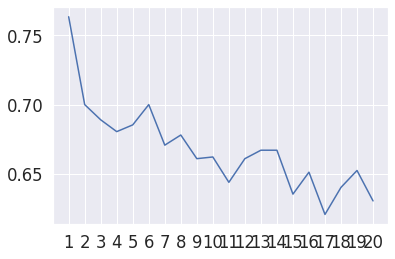

In [162]:
plt.plot(neighbors,test_scores)
plt.xticks(np.arange(1, 21, 1))
plt.show()

HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHCV:
1. Logistic Regression
2. Random forest classifier



In [163]:
# creating hyperparameter grid for logistic regression 

log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}
# hyperparameter grid for Randomforest

rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}


In [164]:
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fitting the hyperparameter for Logistic regression

rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [165]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [166]:
rs_log_reg.score(x_test,y_test)

0.8121951219512196

In [167]:
# from sklearn.model_selection import RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           verbose=True,
                           n_iter=20)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [168]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_depth': 10}

In [169]:
rs_rf.score(x_test,y_test)

0.8170731707317073

Hypertuning using GridSearchCV

In [170]:
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [171]:
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [172]:
gs_log_reg.score(x_test,y_test)

0.8121951219512196

Evaluating the Model

In [173]:
# Roc curve and AUC score
# Confusion matrix
# Claassification report
# Precision
# Recall
# F1-score
# Using cross validation wherever possible

In [174]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


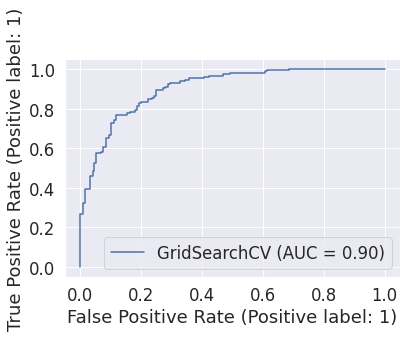

In [175]:
# plot roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test,y_test)

In [176]:
cm = confusion_matrix(y_test,y_preds)
print(cm)

[[305 114]
 [ 40 361]]


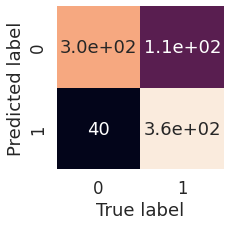

In [177]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Classification report and a cross-validated precision, recall and f1score

In [178]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       419
           1       0.76      0.90      0.82       401

    accuracy                           0.81       820
   macro avg       0.82      0.81      0.81       820
weighted avg       0.82      0.81      0.81       820



In [179]:
# using cross validation for certain features:


In [180]:
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [181]:
clf = LogisticRegression(C= 0.38566204211634725, solver='liblinear')

In [182]:
# Cross-validated accuracy, precision, recall, F1_score
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_accuracy

array([0.87804878, 0.85853659, 0.87317073, 0.8195122 , 0.80487805])

In [183]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.846829268292683

In [184]:
from sklearn.model_selection import cross_val_score
cv_precision = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_precision

array([0.84482759, 0.83333333, 0.84347826, 0.78813559, 0.78448276])

In [185]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8188515064501647

In [186]:
from sklearn.model_selection import cross_val_score
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall

array([0.93333333, 0.9047619 , 0.92380952, 0.88571429, 0.85849057])

In [187]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9012219227313567

In [188]:
from sklearn.model_selection import cross_val_score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1

array([0.88687783, 0.86757991, 0.88181818, 0.83408072, 0.81981982])

In [189]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8580352911713778

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

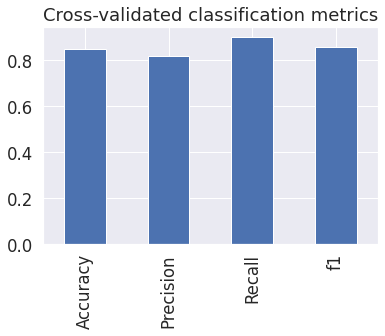

In [190]:
# Visualizing coss-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'f1': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False)


**We are getting recall score of almost 90 which is a very good score fro a model.**

Feature Importance: Which features contributed to the output and how did they?

## **Feature Importance**
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model

In [191]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);
clf.coef_

array([[-0.01768679, -0.6620852 ,  0.78701624, -0.0037533 , -0.0028144 ,
        -0.20147214,  0.39799153,  0.03093572, -0.78512205, -0.44769409,
         0.05060962, -0.57802291, -0.60455799]])

In [192]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [193]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.017686793800395766,
 'sex': -0.6620852048034451,
 'cp': 0.787016240780664,
 'trestbps': -0.0037533027093641157,
 'chol': -0.0028143976256341007,
 'fbs': -0.20147213990460844,
 'restecg': 0.39799152537304244,
 'thalach': 0.030935720016446285,
 'exang': -0.7851220481887086,
 'oldpeak': -0.447694088332506,
 'slope': 0.05060962293206355,
 'ca': -0.5780229118933855,
 'thal': -0.6045579904948927}

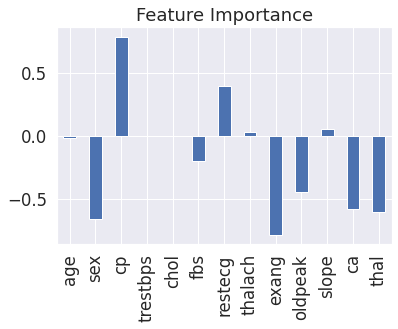

In [194]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

**Here we can see that our target is mostly affected by 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal'**

**Other features have very less effect on our target.**

In [195]:
x_train_n = x_train.drop(['trestbps','chol'], axis=1)
x_train_n
x_test_n = x_test.drop(['trestbps','chol'], axis=1)
x_test_n

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
539,64,1,3,0,0,155,0,0.6,1,0,3
42,61,0,0,0,0,169,0,0.0,2,0,2
571,60,1,0,0,0,142,1,2.8,1,2,3
240,54,0,1,1,0,159,1,0.0,2,1,2
1013,58,1,0,0,2,140,0,4.4,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
60,29,1,1,0,0,202,0,0.0,2,0,2
285,71,0,2,1,0,130,0,0.0,2,1,2
547,67,0,0,0,1,142,0,0.3,2,2,2
186,40,1,0,0,0,114,1,2.0,1,0,3


In [196]:
lr.fit(x_train_n,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [197]:
y_pred_n = lr.predict(x_test_n)

In [198]:
pd.DataFrame(confusion_matrix(y_pred_n,y_test))

,0,1
0,299,38
1,120,363


In [199]:
accuracy_score(y_pred_n,y_test)

0.8073170731707318

In [200]:
rfc.fit(x_train_n,y_train)

RandomForestClassifier()

In [201]:
y_pred_n = rfc.predict(x_test_n)

In [202]:
confusion_matrix(y_pred_n,y_test)

array([[346,  25],
       [ 73, 376]])

In [203]:
accuracy_score(y_pred_n,y_test)

0.8804878048780488